In [1]:
import pandas as pd
import numpy as np
from numpy import mean
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
dataset = pd.read_csv("BRFSS_Data.csv")

print("Dataset shape: ", dataset.shape)

Dataset shape:  (450016, 358)


In [3]:
# Dataset shape after removing the columns with null values
data = dataset.dropna(axis='columns') 

print("Dataset shape after removing the columns with null values: ", data.shape)

Dataset shape after removing the columns with null values:  (450016, 62)


In [4]:
# Dataset shape after removing the columns with more than 50% of null values
data = dataset.loc[:, dataset.isnull().mean() < 0.50]

print("Dataset shape after removing the columns with more than 50% of null values: ", data.shape)
data.head()

Dataset shape after removing the columns with more than 50% of null values:  (450016, 183)


,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,SAFETIME,...,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_AIDTST3
0,1,1,1302017,1,30,2017,1100,2017000001,2017000001,NaN,...,1,1,1,1,1,1,1,1,1,1.0
1,1,1,1122017,1,12,2017,1100,2017000002,2017000002,NaN,...,1,1,1,1,1,1,1,1,1,1.0
2,1,1,1102017,1,10,2017,1100,2017000003,2017000003,NaN,...,2,3,3,2,2,4,2,1,1,2.0
3,1,1,2082017,2,8,2017,1200,2017000004,2017000004,NaN,...,9,9,9,9,9,9,9,9,9,NaN
4,1,1,1302017,1,30,2017,1100,2017000005,2017000005,NaN,...,2,3,3,2,2,4,2,1,2,2.0


In [5]:
# Mode imputation of missing values in the dataset
data = data.fillna(data.mode().iloc[0])

print("Data shape after mode imputation:", data.shape)
data.head()

Data shape after mode imputation: (450016, 183)


,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,SAFETIME,...,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_AIDTST3
0,1,1,1302017,1,30,2017,1100,2017000001,2017000001,1.0,...,1,1,1,1,1,1,1,1,1,1.0
1,1,1,1122017,1,12,2017,1100,2017000002,2017000002,1.0,...,1,1,1,1,1,1,1,1,1,1.0
2,1,1,1102017,1,10,2017,1100,2017000003,2017000003,1.0,...,2,3,3,2,2,4,2,1,1,2.0
3,1,1,2082017,2,8,2017,1200,2017000004,2017000004,1.0,...,9,9,9,9,9,9,9,9,9,2.0
4,1,1,1302017,1,30,2017,1100,2017000005,2017000005,1.0,...,2,3,3,2,2,4,2,1,2,2.0


In [6]:
# Drop some less important features from the database
data = data.drop(["_STATE","FMONTH","IDATE","IMONTH","IDAY","IYEAR","DISPCODE","SEQNO","_PSU"], axis=1)
data.head()

,SAFETIME,CTELNUM1,CELLFON5,CADULT,PVTRESD3,CSTATE1,LANDLINE,GENHLTH,PHYSHLTH,MENTHLTH,...,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_AIDTST3
0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,88.0,88.0,...,1,1,1,1,1,1,1,1,1,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,88.0,88.0,...,1,1,1,1,1,1,1,1,1,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,88.0,88.0,...,2,3,3,2,2,4,2,1,1,2.0
3,1.0,1.0,1.0,1.0,1.0,1.0,2.0,4.0,88.0,88.0,...,9,9,9,9,9,9,9,9,9,2.0
4,1.0,1.0,1.0,1.0,1.0,1.0,2.0,4.0,14.0,88.0,...,2,3,3,2,2,4,2,1,2,2.0


### Unsupervised Learning

#### K-means Clustering - Find optimal 'k'

In [7]:
# KMeans clustering of data using k value from 2 to 10
res = list()
n_cluster = range(2,11)
for n in n_cluster:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(data)
    res.append(np.average(np.min(cdist(data, kmeans.cluster_centers_, 'euclidean'), axis=1)))

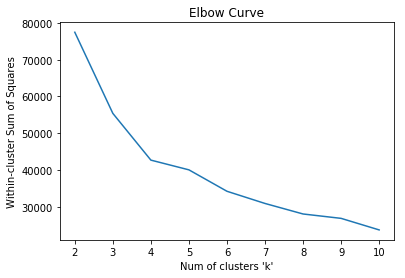

In [8]:
# Plot the elbow graph to select the optimal value of k for kmeans clustering
plt.plot(n_cluster, res)
plt.title('Elbow Curve')
plt.xlabel("Num of clusters 'k'")
plt.ylabel("Within-cluster Sum of Squares")
plt.show()

#### Principal Component Analysis and K-Means Clustering

In [9]:
#Principal Component Analysis (PCA) of the data

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data)
pcaData = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
pcaData.head()

,PC1,PC2
0,-278740.115769,-8359.739280
1,-278739.617618,-8345.255020
2,-278741.471749,-8160.010746
3,-278740.994365,-8263.338956
4,-278741.170536,-8257.223410


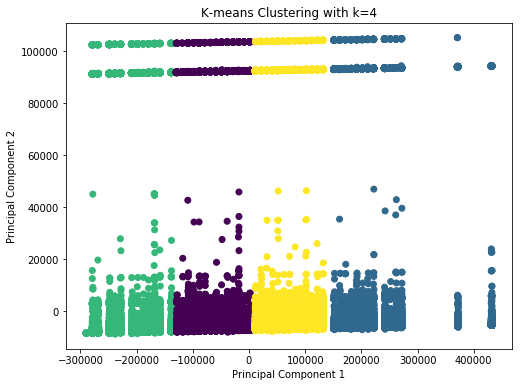

In [10]:
# K-means clustering on the data after PCA
model = KMeans(n_clusters=4).fit(pcaData)

# Visualization
plt.figure(figsize=(8, 6))
plt.title('K-means Clustering with k=4')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.scatter(principalComponents[:,0], principalComponents[:,1], c=model.labels_.astype(float))

### Supervised Learning

#### The dataset is made supervised by considering BMI level as target.
#### A BMI value of 25 is taken as cut-off, where BMI = 25 means the person is overweight (Class = 1), otherwise the person is normal (Class = -1).

In [11]:
# Target variable we want to classify using decision tree - BMI
target_raw = data['_BMI5CAT']

# Replace BMI={3,4} with 1 indicating BMI >= 25 and overweight and replace BMI={1,2} with -1 indicating normal
target_replace = {3:1,4:1,1:-1,2:-1} 
target = target_raw.replace(target_replace)

# Add the target variable to the last column of the dataframe as 'Class'
data["Class"] = target

# Drop the actual bmi columns along with other unimportant features
data = data.drop(["_BMI5", "_BMI5CAT", "_RFBMI5"], axis=1)
                  
data.head()

,SAFETIME,CTELNUM1,CELLFON5,CADULT,PVTRESD3,CSTATE1,LANDLINE,GENHLTH,PHYSHLTH,MENTHLTH,...,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_AIDTST3,Class
0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,88.0,88.0,...,1,1,1,1,1,1,1,1,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,88.0,88.0,...,1,1,1,1,1,1,1,1,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,88.0,88.0,...,3,3,2,2,4,2,1,1,2.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,2.0,4.0,88.0,88.0,...,9,9,9,9,9,9,9,9,2.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,2.0,4.0,14.0,88.0,...,3,3,2,2,4,2,1,2,2.0,-1.0


In [12]:
# Split the data into training set (80%) and testing set (20%) for testing and calculating accuracy

X = data.drop('Class', axis=1)  
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)  

print('Shape of training data: ', X_train.shape)
print('Shape of testing data: ', X_test.shape)

Shape of training data:  (360012, 171)
Shape of testing data:  (90004, 171)


In [13]:
# Function to make predictions 
def prediction(X_test, clf_object): 
  
    # Predicton on test with giniIndex 
    y_pred = clf_object.predict(X_test) 
    print("Predicted values:") 
    print(y_pred) 
    return y_pred 

In [14]:
# Function to calculate accuracy 
def cal_accuracy(y_test, y_pred): 
      
    print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred)) 
      
    print ("Accuracy : ", accuracy_score(y_test,y_pred)*100) 
      
    print("Report : \n", classification_report(y_test, y_pred))

#### Decision Tree Classifier using Gini Index and Entropy

In [15]:
# Function to perform training with giniIndex. 
def train_using_gini(X_train, X_test, y_train): 
  
    # Creating the classifier object 
    clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=3, min_samples_leaf=5) 
  
    # Performing training 
    clf_gini.fit(X_train, y_train) 
    return clf_gini 

In [16]:
# Function to perform training with entropy. 
def train_using_entropy(X_train, X_test, y_train): 
  
    # Decision tree with entropy 
    clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 3, min_samples_leaf = 5) 
  
    # Performing training 
    clf_entropy.fit(X_train, y_train) 
    return clf_entropy 

In [17]:
# Decision Tree Classifier - main function
def main(): 
      
    # Building Phase 
    clf_gini = train_using_gini(X_train, X_test, y_train) 
    clf_entropy = train_using_entropy(X_train, X_test, y_train) 
      
    # Operational Phase 
    print("-------- Results Using Gini Index --------\n") 
      
    # Prediction using gini 
    y_pred_gini = prediction(X_test, clf_gini) 
    cal_accuracy(y_test, y_pred_gini) 
      
    print("-------- Results Using Entropy --------\n") 
    # Prediction using entropy 
    y_pred_entropy = prediction(X_test, clf_entropy) 
    cal_accuracy(y_test, y_pred_entropy) 

In [18]:
from sklearn.metrics import confusion_matrix 
# Calling the main function 
if __name__=="__main__": 
    main() 

-------- Results Using Gini Index --------

Predicted values:
[ 1.  1. -1. ...  1.  1.  1.]
Confusion Matrix: 
 [[23660  3406     0     0     0     0     0     0     0     0     0     0]
 [ 2995 59933     0     0     0     0     0     0     0     0     0     0]
 [    1     0     0     0     0     0     0     0     0     0     0     0]
 [    0     1     0     0     0     0     0     0     0     0     0     0]
 [    1     0     0     0     0     0     0     0     0     0     0     0]
 [    0     1     0     0     0     0     0     0     0     0     0     0]
 [    0     1     0     0     0     0     0     0     0     0     0     0]
 [    0     1     0     0     0     0     0     0     0     0     0     0]
 [    0     1     0     0     0     0     0     0     0     0     0     0]
 [    0     1     0     0     0     0     0     0     0     0     0     0]
 [    0     1     0     0     0     0     0     0     0     0     0     0]
 [    0     1     0     0     0     0     0     0     0     0  

#### AdaBoost Classifier

In [20]:
# Create a default Adaboost Classifer object with DecisionTreeClassifier as its base estimator
adaboost = AdaBoostClassifier(n_estimators=50, learning_rate=1)

# Train Adaboost Classifer
model = adaboost.fit(X_train, y_train)

print("-------- Results Using Default AdaBoost --------\n")

# Predict using Adaboost Classifer
y_pred = prediction(X_test, model)

# Calculate accuracy
cal_accuracy(y_test, y_pred)

-------- Results Using Default AdaBoost --------

Predicted values:
[ 1.  1. -1. ... -1.  1.  1.]
Confusion Matrix: 
 [[20797  6269     0     0     0     0     0     0     0     0     0     0
      0]
 [ 7019 55909     0     0     0     0     0     0     0     0     0     0
      0]
 [    0     0     0     0     0     0     1     0     0     0     0     0
      0]
 [    0     0     0     0     0     0     1     0     0     0     0     0
      0]
 [    0     0     0     0     0     0     1     0     0     0     0     0
      0]
 [    0     0     0     0     0     0     1     0     0     0     0     0
      0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [    0     0     0     0     0     0     1     0     0     0     0     0
      0]
 [    0     0     0     0     0     0     1     0     0     0     0     0
      0]
 [    0     0     0     0     0     0     1     0     0     0     0     0
      0]
 [    0     0     0     0     0     0     1     0   

#### Multi-layer Perceptron Classifier

In [21]:
# Create a Multi-layer Perceptron Classifer object
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))

# Train the Multi-Layer Perceptron Classifer
model = mlp.fit(X_train,y_train)

print("-------- Results Using Multi-layer Perceptron --------\n")

# Predict using Multi-Layer Perceptron Classifer
y_pred = prediction(X_test, model) 

# Calculate accuracy
cal_accuracy(y_test, y_pred)

-------- Results Using Multi-layer Perceptron --------

Predicted values:
[ 1.  1. -1. ...  1.  1.  1.]
Confusion Matrix: 
 [[20899  6167     0     0     0     0     0     0     0     0     0     0]
 [  928 62000     0     0     0     0     0     0     0     0     0     0]
 [    1     0     0     0     0     0     0     0     0     0     0     0]
 [    1     0     0     0     0     0     0     0     0     0     0     0]
 [    1     0     0     0     0     0     0     0     0     0     0     0]
 [    1     0     0     0     0     0     0     0     0     0     0     0]
 [    1     0     0     0     0     0     0     0     0     0     0     0]
 [    1     0     0     0     0     0     0     0     0     0     0     0]
 [    1     0     0     0     0     0     0     0     0     0     0     0]
 [    1     0     0     0     0     0     0     0     0     0     0     0]
 [    1     0     0     0     0     0     0     0     0     0     0     0]
 [    1     0     0     0     0     0     0     0  